In [2]:
import numpy as np
from PIL import Image
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2

In [3]:
x_data = np.load('./data/bending1/x.p.npy')
x_data = x_data.squeeze(-1)  # removes the last singleton dimension
y_data = np.load('./data/bending1/y.p.npy')
y_data = y_data.reshape(-1,36,36)

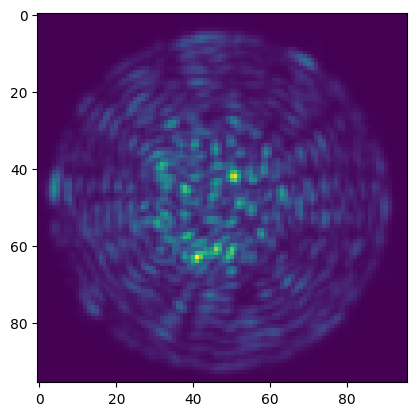

In [4]:
plt.imshow(x_data[0])

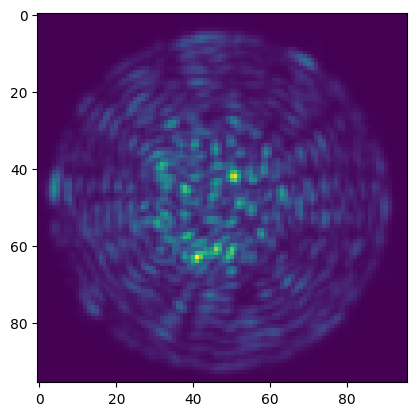

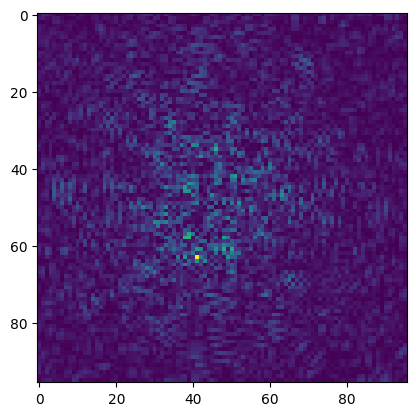

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_data[0])
plt.show()
# Assuming `x_data[0]` is the Fourier transform of the image
# Inverse Fourier Transform to get back to the spatial domain

# Remove noise by masking or filtering in frequency domain
fourier_transform = np.fft.fftshift(np.fft.fft2(x_data[0]))
magnitude_spectrum = np.abs(fourier_transform)

# Filter out high frequencies (simple low-pass filter)
filtered_spectrum = np.copy(fourier_transform)
filtered_spectrum[magnitude_spectrum > np.percentile(magnitude_spectrum, 90)] = 0

# Inverse FFT to get back the improved image
improved_image = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum))
plt.imshow(np.abs(improved_image))
plt.show()


In [24]:
# !pip install opencv_python

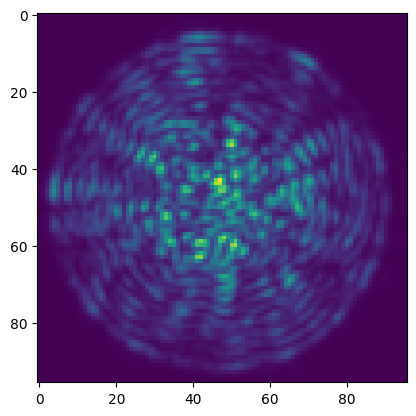

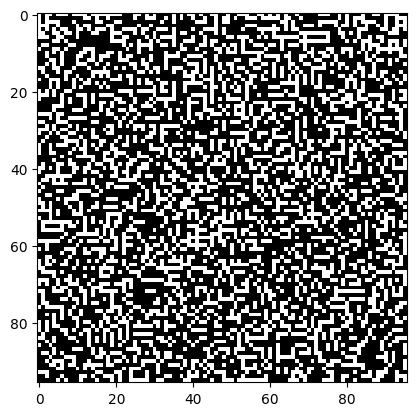

In [50]:
import cv2
plt.imshow(x_data[9])
plt.show()
edges = cv2.Canny(x_data[9].astype(np.uint8), threshold1=100, threshold2=200)
plt.imshow(edges, cmap='gray')
plt.show()

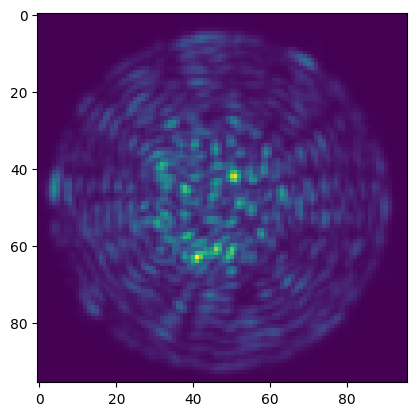

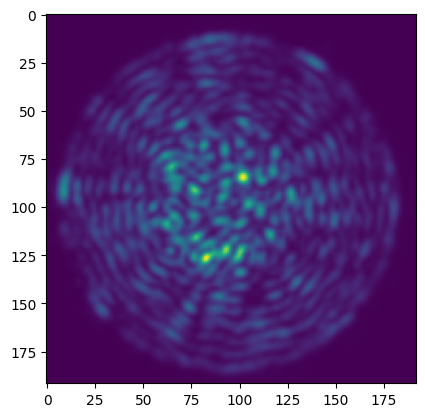

In [11]:
plt.imshow(x_data[0])
plt.show()
upscaled_image = cv2.resize(x_data[0], None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(upscaled_image)
plt.show()

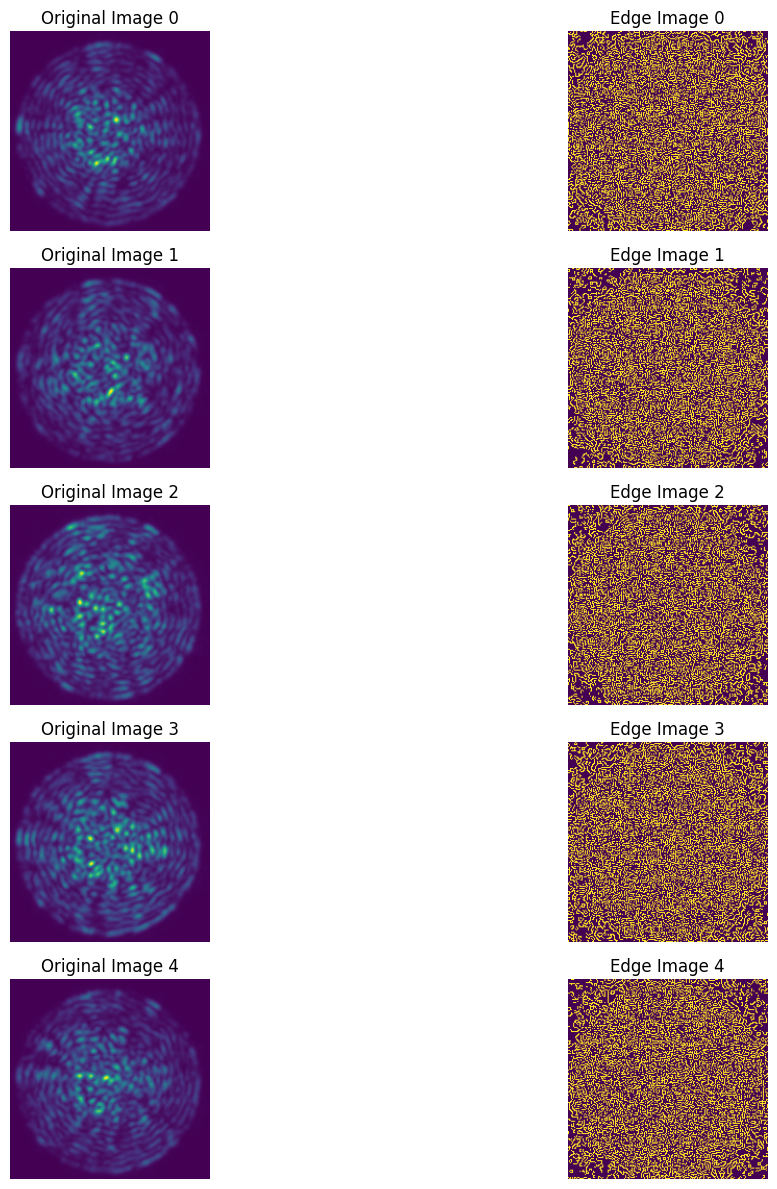

In [54]:
plt.figure(figsize=(15, 12))  # Adjust the figure size (optional)
import cv2
for i in range(5):
    # Get the original image from x_data
    original_image = x_data[i]
    original_image = cv2.resize(x_data[i], None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Apply Canny edge detection
    edges = cv2.Canny(original_image.astype(np.uint8), threshold1=100, threshold2=200)

    # Display the original image
    plt.subplot(5, 2, 2*i+1)  # 5 rows, 2 columns, odd indices for originals
    plt.imshow(original_image)
    plt.title(f'Original Image {i}')
    plt.axis('off')  # Hide axes

    # Display the edge-detected image
    plt.subplot(5, 2, 2*i+2)  # 5 rows, 2 columns, even indices for edges
    plt.imshow(edges)
    plt.title(f'Edge Image {i}')
    plt.axis('off')  # Hide axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

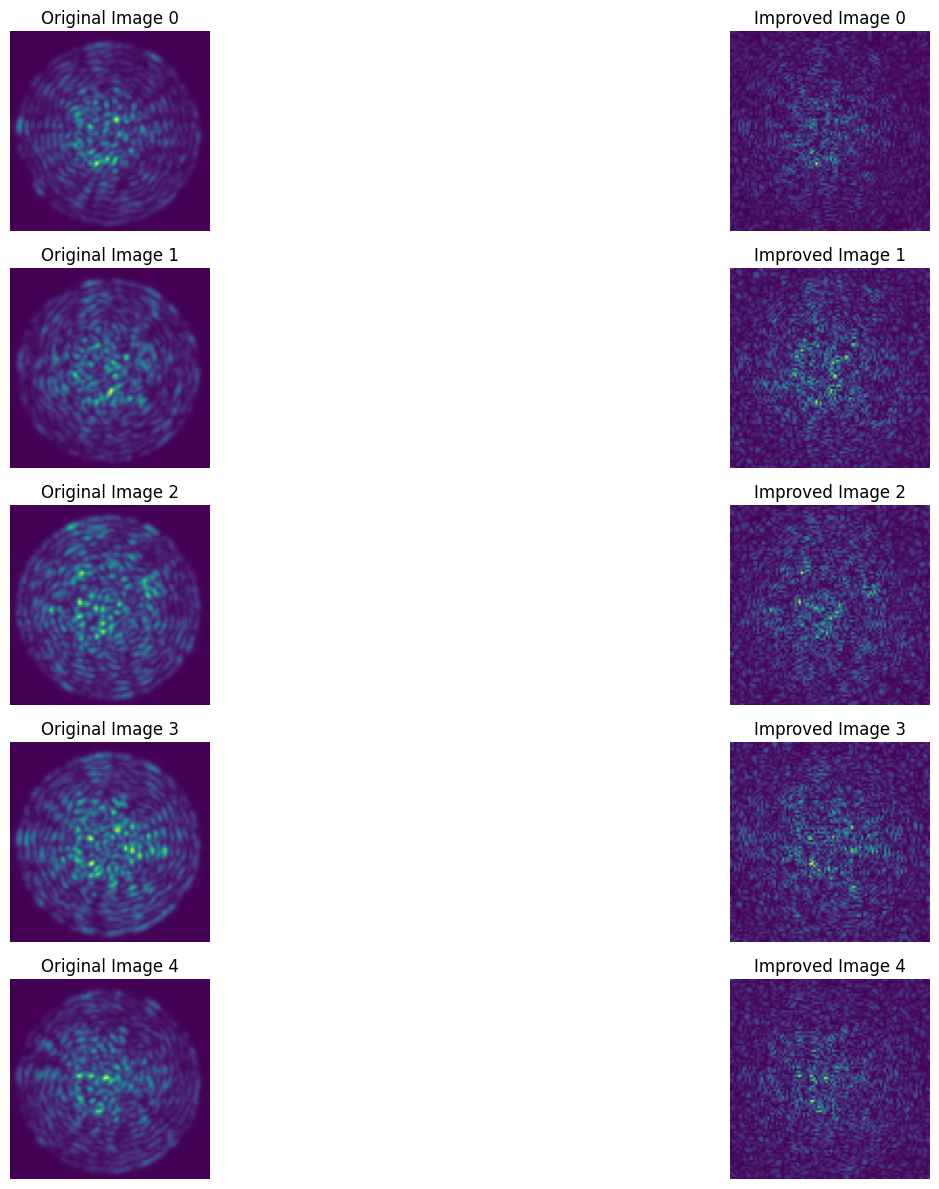

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure to display the images (5 pairs of images)
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

# Loop through the first 5 images in x_data
for i in range(5):
    # Get the original image
    original_image = x_data[i]
    
    # Fourier Transform
    fourier_transform = np.fft.fftshift(np.fft.fft2(original_image))  # FFT and shift zero frequency component
    magnitude_spectrum = np.abs(fourier_transform)

    # Apply low-pass filter: Remove high frequencies by setting values above the 90th percentile to zero
    filtered_spectrum = np.copy(fourier_transform)
    filtered_spectrum[magnitude_spectrum > np.percentile(magnitude_spectrum, 90)] = 0

    # Inverse Fourier Transform to get the improved image
    improved_image = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum))

    # Show the original image (left column)
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(original_image)
    plt.title(f'Original Image {i}')
    plt.axis('off')

    # Show the improved image (right column)
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(np.abs(improved_image))
    plt.title(f'Improved Image {i}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


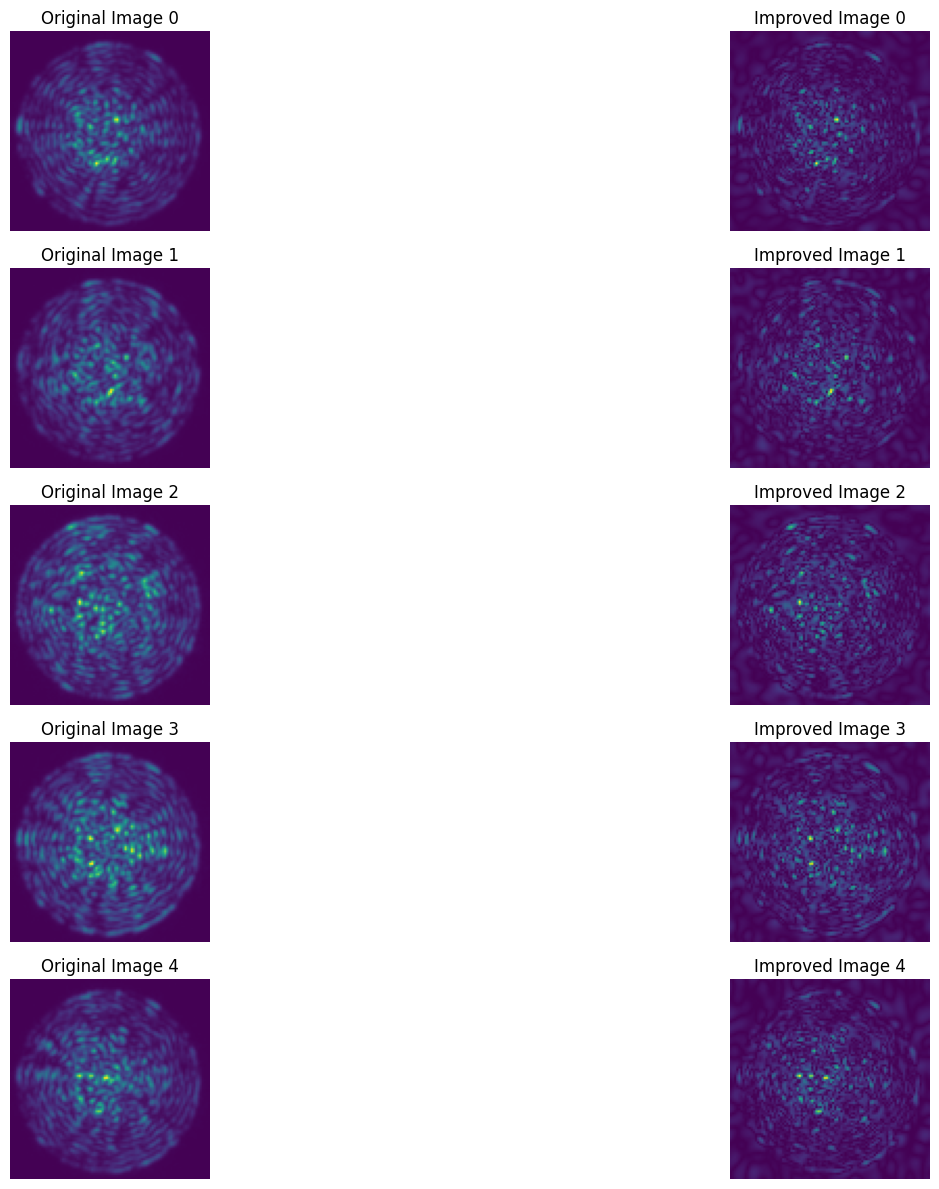

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure to display the images (5 pairs of images)
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

# Loop through the first 5 images in x_data
for i in range(5):
    # Get the original image
    original_image = x_data[i]
    
    # Fourier Transform
    fourier_transform = np.fft.fftshift(np.fft.fft2(original_image))  # FFT and shift zero frequency component
    magnitude_spectrum = np.abs(fourier_transform)

    # Apply stronger low-pass filter: Remove more high frequencies
    filtered_spectrum = np.copy(fourier_transform)
    filtered_spectrum[magnitude_spectrum > np.percentile(magnitude_spectrum, 99)] = 0  # 95th percentile

    # Inverse Fourier Transform to get the improved image
    improved_image = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum))

    # Show the original image (left column)
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(original_image)
    plt.title(f'Original Image {i}')
    plt.axis('off')

    # Show the improved image (right column)
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(np.abs(improved_image))
    plt.title(f'Improved Image {i}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


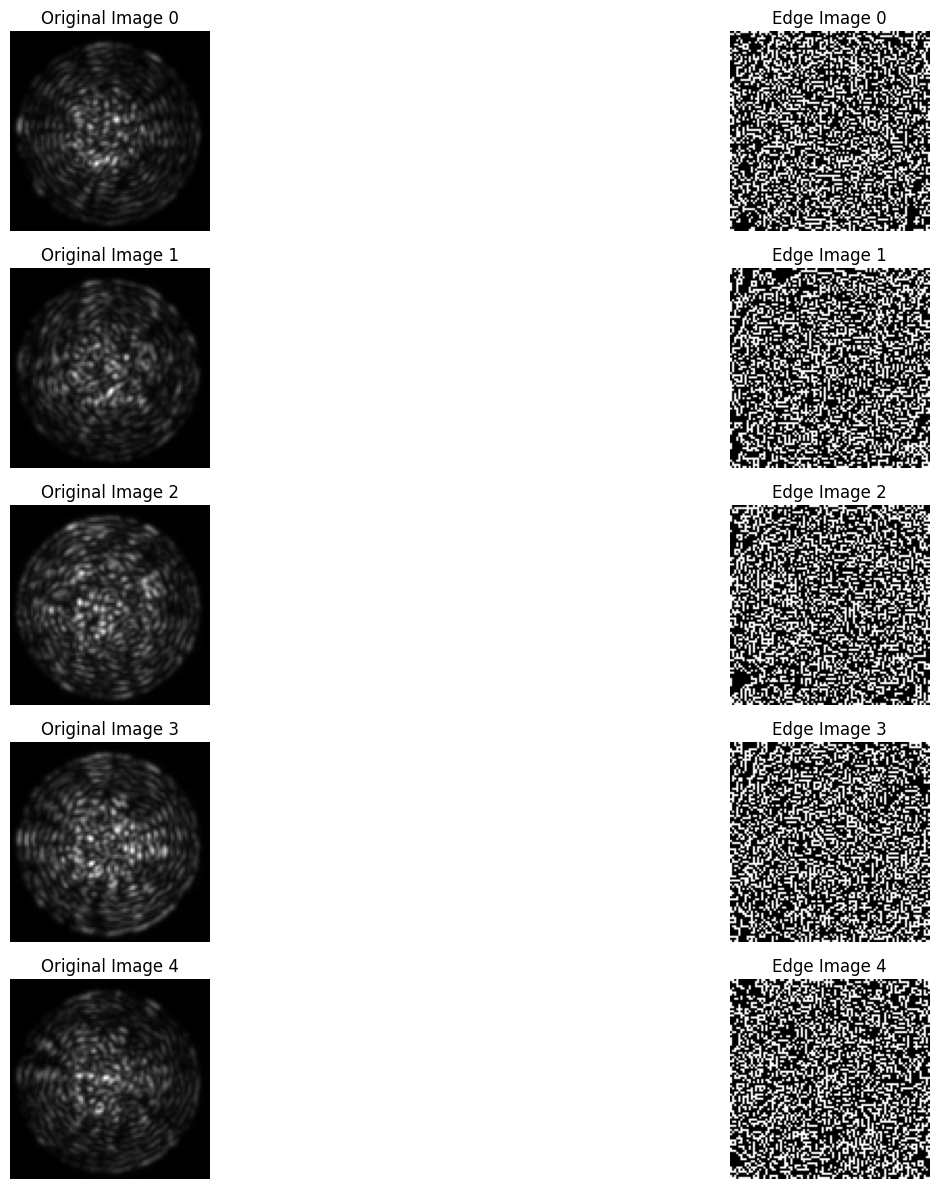

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create a figure to display the images (5 pairs of images)
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

# Loop through the first 5 images in x_data
for i in range(5):
    # Get the original image
    original_image = x_data[i]
    
    # Apply Canny edge detection directly on the spatial domain (original image)
    edges = cv2.Canny(original_image.astype(np.uint8), threshold1=100, threshold2=200)

    # Show the original image (left column)
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Original Image {i}')
    plt.axis('off')

    # Show the edge-detected image (right column)
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Image {i}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [102]:
x_data = np.load('./data/bending1/x.p.npy')
x_data = x_data.squeeze(-1)  # Remove the last singleton dimension

# Convert x_data to a PyTorch tensor
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)

# Define a custom Dataset class
class ImageDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # You can also add any transformations here if needed
        sample = self.data[idx]
        return sample

# Create the Dataset
dataset = ImageDataset(x_data_tensor)

# Create the DataLoader
batch_size = 32  # Example batch size
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [16]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import numpy as np

# Assuming x_data[0] is a numpy ndarray
img_array = x_data[1]

# Convert numpy array to PIL Image if necessary
# img = Image.fromarray(img_array)

x_data_img = torch.tensor(img_array, dtype=torch.float32)

# Add the channel dimension for grayscale images (1 channel)
x_data_tensor = x_data_img.unsqueeze(1)

transform = transforms.Compose([
    transforms.Resize((96, 96)),  # Resize to the expected size
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Define the transformations (resize, convert to tensor, etc.)
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),  # Resize the image if necessary
#     transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if needed
#     transforms.ToTensor(),  # Convert numpy array to Tensor
#     transforms.Normalize((0.5,), (0.5,))  # Normalize, if necessary
# ])

# Apply the transformations (works with PIL image now)
img_tensor = transform(x_data_tensor)

# Add batch dimension if necessary (for models)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Optionally, you can print the tensor to verify the result
print(img_tensor.shape)


torch.Size([1, 96, 96, 96])


In [93]:
import torch.nn as nn

# Define a simple Autoencoder model
class SimpleAutoencoder(nn.Module):
    def __init__(self):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # Example conv layer
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # Another conv layer
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 256)  # Latent vector size of 256
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 32 * 16 * 16),
            nn.ReLU(),
            nn.Unflatten(1, (32, 16, 16)),  # Reshape to match image size
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        latent = self.encoder(x)  # Latent vector
        reconstructed = self.decoder(latent)
        return latent, reconstructed

# Instantiate the model
model = SimpleAutoencoder()
model.eval()  # Set the model to evaluation mode


SimpleAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=8192, out_features=256, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=256, out_features=8192, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(32, 16, 16))
    (3): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (6): Sigmoid()
  )
)

In [34]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau


# Load the data
x_data = np.load('./data/bending1/x.p.npy')
x_data = x_data.squeeze(-1)  # Remove the last singleton dimension if necessary

# Convert to PyTorch tensor
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)

# Add the channel dimension for grayscale images (1 channel)
x_data_tensor = x_data_tensor.unsqueeze(1)  # Shape: [batch_size, 1, 96, 96]

# Define transformations (e.g., resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((96, 96)),  # Resize to the expected size
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Define the Dataset and DataLoader
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]

        # Apply transformations if specified
        if self.transform:
            image = self.transform(image)
            
        return image

# Create Dataset and DataLoader
dataset = ImageDataset(x_data_tensor, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# Define the Autoencoder Model
class SimpleAutoencoder(nn.Module):
    def __init__(self):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # 1x96x96 -> 16x48x48
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # 16x48x48 -> 32x24x24
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 24 * 24, 256)  # Latent vector size of 256
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 32 * 24 * 24),
            nn.ReLU(),
            nn.Unflatten(1, (32, 24, 24)),  # Reshape to match image size
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            # nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        latent = self.encoder(x)  # Latent vector
        reconstructed = self.decoder(latent)
        return latent, reconstructed

# Instantiate the model

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
model = SimpleAutoencoder()

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Training loop
for epoch in range(50):  # Example: 10 epochs
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for data in data_loader:
        optimizer.zero_grad()

        # Forward pass: get latent vector and reconstructed image
        latent_vector, reconstructed_image = model(data)

        # Calculate the loss (Mean Squared Error)
        loss = criterion(reconstructed_image, data)
        running_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    avg_loss = running_loss / len(data_loader)
    scheduler.step(avg_loss)  # step once per epoch, after avg loss
    print(f"Epoch [{epoch+1}/50], Loss: {avg_loss:.6f}, LR: {optimizer.param_groups[0]['lr']:.6f}")

    # print(f"Epoch [{epoch+1}/10], Loss: {running_loss / len(data_loader):.4f}")


Epoch [1/50], Loss: 26098423.974747, LR: 0.000100
Epoch [2/50], Loss: 15222890.505051, LR: 0.000100
Epoch [3/50], Loss: 12026602.132576, LR: 0.000100
Epoch [4/50], Loss: 10449423.312290, LR: 0.000100
Epoch [5/50], Loss: 9510651.807660, LR: 0.000100
Epoch [6/50], Loss: 8891013.922559, LR: 0.000100
Epoch [7/50], Loss: 8445328.320286, LR: 0.000100
Epoch [8/50], Loss: 8106221.175505, LR: 0.000100
Epoch [9/50], Loss: 7838497.923401, LR: 0.000100
Epoch [10/50], Loss: 7617983.273569, LR: 0.000100


In [35]:
for epoch in range(10,50):  # Example: 10 epochs
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for data in data_loader:
        optimizer.zero_grad()

        # Forward pass: get latent vector and reconstructed image
        latent_vector, reconstructed_image = model(data)

        # Calculate the loss (Mean Squared Error)
        loss = criterion(reconstructed_image, data)
        running_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    avg_loss = running_loss / len(data_loader)
    scheduler.step(avg_loss)  # step once per epoch, after avg loss
    print(f"Epoch [{epoch+1}/50], Loss: {avg_loss:.6f}, LR: {optimizer.param_groups[0]['lr']:.6f}")

Epoch [11/50], Loss: 7437228.481481, LR: 0.000100
Epoch [12/50], Loss: 7282961.562290, LR: 0.000100
Epoch [13/50], Loss: 7148394.896044, LR: 0.000100
Epoch [14/50], Loss: 7035553.935185, LR: 0.000100
Epoch [15/50], Loss: 6931269.393519, LR: 0.000100
Epoch [16/50], Loss: 6840558.516835, LR: 0.000100
Epoch [17/50], Loss: 6758852.841330, LR: 0.000100
Epoch [18/50], Loss: 6685305.265152, LR: 0.000100
Epoch [19/50], Loss: 6617798.616162, LR: 0.000100
Epoch [20/50], Loss: 6557605.393939, LR: 0.000100
Epoch [21/50], Loss: 6500429.399411, LR: 0.000100
Epoch [22/50], Loss: 6444402.051347, LR: 0.000100
Epoch [23/50], Loss: 6399900.471380, LR: 0.000100
Epoch [24/50], Loss: 6349823.835859, LR: 0.000100
Epoch [25/50], Loss: 6306440.568182, LR: 0.000100
Epoch [26/50], Loss: 6268703.245370, LR: 0.000100
Epoch [27/50], Loss: 6228361.909933, LR: 0.000100
Epoch [28/50], Loss: 6190507.646886, LR: 0.000100
Epoch [29/50], Loss: 6157481.015993, LR: 0.000100
Epoch [30/50], Loss: 6126730.932239, LR: 0.000100


In [ ]:
for epoch in range(93,200):  # Example: 10 epochs
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for data in data_loader:
        optimizer.zero_grad()

        # Forward pass: get latent vector and reconstructed image
        latent_vector, reconstructed_image = model(data)

        # Calculate the loss (Mean Squared Error)
        loss = criterion(reconstructed_image, data)
        running_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    avg_loss = running_loss / len(data_loader)
    scheduler.step(avg_loss)  # step once per epoch, after avg loss
    print(f"Epoch [{epoch+1}/200], Loss: {avg_loss:.6f}, LR: {optimizer.param_groups[0]['lr']:.6f}")

Epoch [94/200], Loss: 5284906.618476, LR: 0.000100
Epoch [95/200], Loss: 5275324.721380, LR: 0.000100
Epoch [96/200], Loss: 5269336.908249, LR: 0.000100
Epoch [97/200], Loss: 5263813.890783, LR: 0.000100
Epoch [98/200], Loss: 5259505.340488, LR: 0.000100
Epoch [99/200], Loss: 5254216.309133, LR: 0.000100
Epoch [100/200], Loss: 5246770.672138, LR: 0.000100
Epoch [101/200], Loss: 5243380.618266, LR: 0.000100
Epoch [102/200], Loss: 5237320.645202, LR: 0.000100
Epoch [103/200], Loss: 5232547.946128, LR: 0.000100
Epoch [104/200], Loss: 5227896.675505, LR: 0.000100
Epoch [105/200], Loss: 5222308.148779, LR: 0.000100
Epoch [106/200], Loss: 5219222.603956, LR: 0.000100
Epoch [107/200], Loss: 5213154.891625, LR: 0.000100
Epoch [108/200], Loss: 5209648.514941, LR: 0.000100
Epoch [109/200], Loss: 5205095.970749, LR: 0.000100
Epoch [110/200], Loss: 5197380.501684, LR: 0.000100
Epoch [111/200], Loss: 5195802.697180, LR: 0.000100
Epoch [112/200], Loss: 5191334.743687, LR: 0.000100
Epoch [113/200], L

In [51]:
loss

tensor(5303951.5000, grad_fn=<MseLossBackward0>)

Latent Vector Shape: torch.Size([1, 256])
Latent Vector: tensor([[ 4.0328e+03,  2.8666e+03,  2.5460e+04, -2.5484e+04, -5.2610e+03,
          1.0064e+04, -3.0876e+04, -3.1249e+04,  2.6448e+04, -8.0800e+02,
         -1.9131e+04, -2.2624e+03, -3.1826e+04,  3.0188e+03,  2.2182e+04,
         -2.4681e+04,  2.5350e+04,  2.0565e+04, -2.2579e+02, -4.0263e+03,
          4.1861e+03,  1.1193e+04, -2.4066e+04,  5.3753e+03,  2.1429e+04,
          1.7298e+04, -2.2221e+03,  2.5785e+03,  1.6487e+04,  6.4663e+03,
          1.8436e+04, -2.4891e+04,  2.2052e+04,  2.1468e+03,  7.8201e+03,
          1.4083e+04,  1.9537e+04,  1.3945e+04, -1.1798e+04,  3.3221e+03,
          6.5498e+04,  5.1954e+03, -5.5152e+03,  2.3224e+04,  2.3743e+04,
          9.7395e+03,  2.9339e+04,  3.3008e+04,  6.4194e+03,  2.4646e+04,
         -8.4543e+03, -2.1559e+04, -8.6016e+03, -2.3608e+04,  1.3883e+04,
         -2.1117e+04, -1.5232e+04, -7.6343e+03, -3.5975e+03, -2.0325e+02,
          3.2415e+04, -1.6815e+04,  7.7297e+03, -6.0492

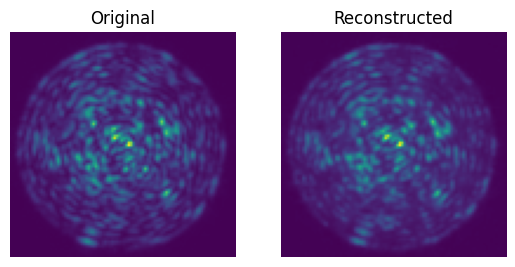

In [52]:
img = x_data[15]
# Get the latent vector from the image
# Convert to float tensor
img_tensor = torch.tensor(img, dtype=torch.float32)

# Normalize if required (e.g., [-1, 1])
img_tensor = (img_tensor - 0.5) / 0.5  # Optional: only if trained this way

# Add channel and batch dimension: [1, 1, 96, 96]
img_tensor = img_tensor.unsqueeze(0).unsqueeze(0)

with torch.no_grad():  # No need to track gradients for inference
    latent_vector, reconstructed_img = model(img_tensor)

# Print the latent vector (you can explore its shape)
print("Latent Vector Shape:", latent_vector.shape)
print("Latent Vector:", latent_vector)

reconstructed_img = reconstructed_img.squeeze().cpu().numpy()
reconstructed_img = (reconstructed_img * 0.5) + 0.5  # [-1,1] → [0,1]

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img)
plt.title("Reconstructed")
plt.axis('off')
plt.show()


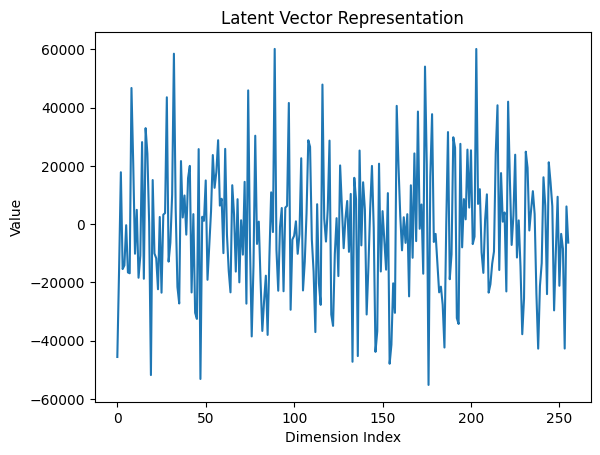

In [44]:
import matplotlib.pyplot as plt

# Convert to numpy and plot
latent_vector_np = latent_vector.squeeze().numpy()  # Convert to numpy array
plt.plot(latent_vector_np)
plt.title('Latent Vector Representation')
plt.xlabel('Dimension Index')
plt.ylabel('Value')
plt.show()


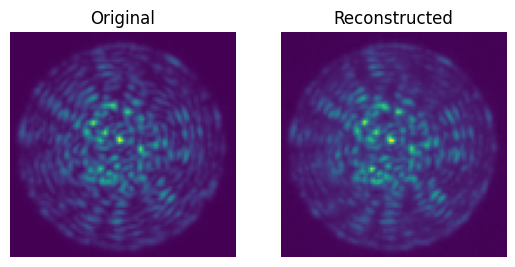

In [45]:
reconstructed_img = reconstructed_img.squeeze().cpu().numpy()
reconstructed_img = (reconstructed_img * 0.5) + 0.5  # [-1,1] → [0,1]

plt.subplot(1, 2, 1)
plt.imshow(x_data[5])
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img)
plt.title("Reconstructed")
plt.axis('off')
plt.show()

In [55]:

# # Assuming img_tensor is the input image you want to pass through the Autoencoder
# # For example, img_tensor = x_data[0] (already preprocessed and in tensor form)

# # Pass the image through the model
# with torch.no_grad():  # No need to compute gradients for inference
#     latent_vector, reconstructed_image = model(img_tensor)

# # Visualize the latent vector
# plt.figure(figsize=(12, 6))

# # Visualize latent vector as a 1D plot (latent_vector is 1D)
# plt.subplot(1, 2, 1)
# plt.plot(latent_vector.squeeze().numpy())  # Remove batch dimension for plotting
# plt.title('Latent Vector')
# plt.xlabel('Dimension')
# plt.ylabel('Value')

# # Visualize reconstructed image
# plt.subplot(1, 2, 2)
# plt.imshow(np.squeeze(reconstructed_image.cpu().numpy()),cmap='gray')  # Squeeze if it's a single channel
# plt.title('Reconstructed Image')
# plt.axis('off')

# plt.tight_layout()
# plt.show()


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, latent_dim=256):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder_cnn = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # [1,96,96] → [16,48,48]
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # → [32,24,24]
            nn.ReLU()
        )
        self.flatten = nn.Flatten()
        self.fc_mu = nn.Linear(32 * 24 * 24, latent_dim)
        self.fc_logvar = nn.Linear(32 * 24 * 24, latent_dim)

        # Decoder
        self.decoder_fc = nn.Linear(latent_dim, 32 * 24 * 24)
        self.decoder_deconv = nn.Sequential(
            nn.ReLU(),
            nn.Unflatten(1, (32, 24, 24)),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()  # Output in [-1, 1] to match normalized input
        )

    def encode(self, x):
        h = self.encoder_cnn(x)
        h_flat = self.flatten(h)
        mu = self.fc_mu(h_flat)
        logvar = self.fc_logvar(h_flat)
        logvar = torch.clamp(logvar, min=-10, max=10)  # ✅ clamp to avoid overflow
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std  # z = μ + σ·ε

    def decode(self, z):
        h = self.decoder_fc(z)
        x_recon = self.decoder_deconv(h)
        return x_recon

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar


In [3]:
def vae_loss(recon_x, x, mu, logvar,beta=0.001):
    recon_loss = F.mse_loss(recon_x, x, reduction='mean')  # or 'sum'
    kl_div = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta* kl_div, recon_loss, kl_div

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]

        # Apply transformations if specified
        if self.transform:
            image = self.transform(image)
            
        return image

In [11]:
x_data = np.load('./data/bending1/x.p.npy')
x_data = x_data.squeeze(-1) 
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)

x_data_tensor = x_data_tensor / 255.0


# Normalize: [0, max] → [0, 1] → [-1, 1]
x_min = x_data_tensor.min()
x_max = x_data_tensor.max()

# Print to confirm
print("Raw min/max:", x_min.item(), x_max.item())


x_data_tensor = (x_data_tensor - x_min) / (x_max - x_min)


# Normalize to [-1, 1] manually
x_data_tensor = (x_data_tensor - 0.5) / 0.5  # Now in [-1, 1]

# Add channel dimension
x_data_tensor = x_data_tensor.unsqueeze(1)  # Shape: [N, 1, 96, 96]

dataset = ImageDataset(x_data_tensor)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

print("Image tensor min:", x_data_tensor.min().item())
print("Image tensor max:", x_data_tensor.max().item())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_vae = VAE(latent_dim=512).to(device)
optimizer = torch.optim.Adam(model_vae.parameters(), lr=0.0001)

for epoch in range(1, 75):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/75] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Raw min/max: 0.6627451181411743 254.89804077148438
Image tensor min: -1.0
Image tensor max: 1.0
Epoch [1/75] | Loss: 0.02979 | Recon: 31.68 | KL: 3704.23
Epoch [2/75] | Loss: 0.00612 | Recon: 6.56 | KL: 711.68
Epoch [3/75] | Loss: 0.00542 | Recon: 5.88 | KL: 557.90
Epoch [4/75] | Loss: 0.00499 | Recon: 5.37 | KL: 553.48
Epoch [5/75] | Loss: 0.00462 | Recon: 4.91 | KL: 585.29
Epoch [6/75] | Loss: 0.00426 | Recon: 4.43 | KL: 622.74
Epoch [7/75] | Loss: 0.00392 | Recon: 3.99 | KL: 665.19
Epoch [8/75] | Loss: 0.00363 | Recon: 3.60 | KL: 709.56
Epoch [9/75] | Loss: 0.00339 | Recon: 3.27 | KL: 748.90
Epoch [10/75] | Loss: 0.00319 | Recon: 3.01 | KL: 783.77
Epoch [11/75] | Loss: 0.00304 | Recon: 2.80 | KL: 813.78
Epoch [12/75] | Loss: 0.00291 | Recon: 2.62 | KL: 839.86
Epoch [13/75] | Loss: 0.00281 | Recon: 2.48 | KL: 862.25
Epoch [14/75] | Loss: 0.00273 | Recon: 2.36 | KL: 881.19
Epoch [15/75] | Loss: 0.00266 | Recon: 2.26 | KL: 897.77
Epoch [16/75] | Loss: 0.00260 | Recon: 2.17 | KL: 912.31

In [10]:
import matplotlib.pyplot as plt

def show_reconstruction(model, data_loader, epoch, device):
    model.eval()
    with torch.no_grad():
        # Get a batch of images
        data_iter = iter(data_loader)
        data = next(data_iter).to(device)

        recon, _, _ = model(data)

        # Convert to numpy
        data = data.cpu().numpy()
        recon = recon.cpu().numpy()

        # De-normalize from [-1, 1] back to [0, 1]
        data = (data * 0.5) + 0.5
        recon = (recon * 0.5) + 0.5

        fig, axes = plt.subplots(2, 8, figsize=(20, 8))
        for i in range(8):
            axes[0, i].imshow(data[i, 0])
            axes[0, i].set_title("Original")
            axes[0, i].axis('off')

            axes[1, i].imshow(recon[i, 0])
            axes[1, i].set_title("Reconstruction")
            axes[1, i].axis('off')

        plt.suptitle(f"Reconstructions at Epoch {epoch}")
        plt.tight_layout()
        plt.show()


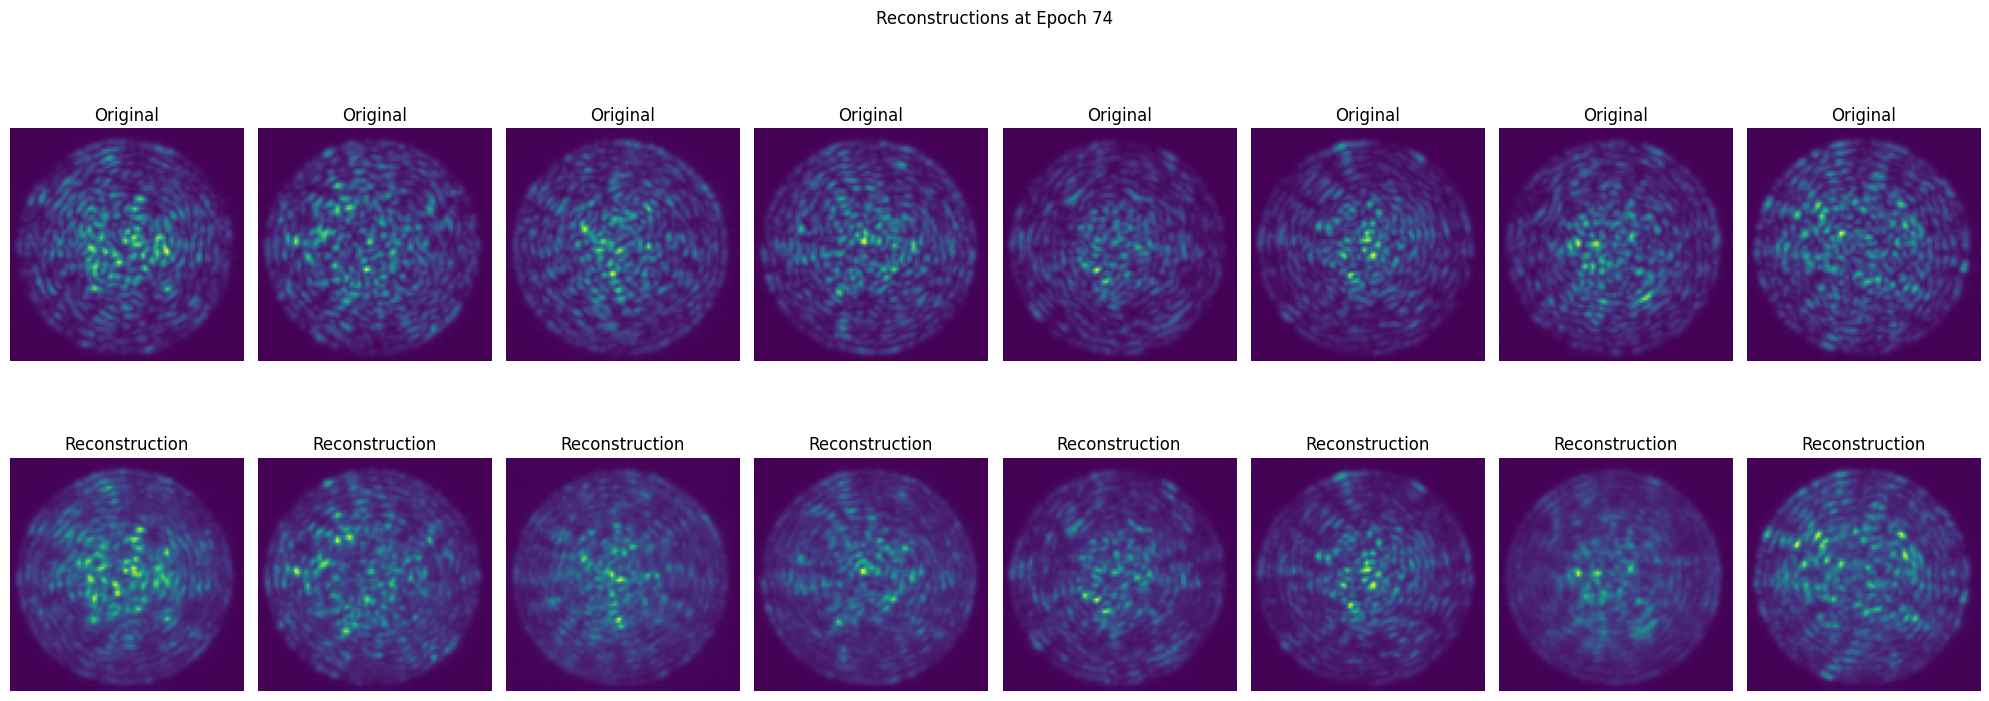

In [15]:
show_reconstruction(model_vae, data_loader, epoch=74, device=device)

In [55]:
model_vae.eval()
latents = []

with torch.no_grad():
    for data in data_loader:
        data = data.to(device)
        mu, _ = model_vae.encode(data)
        latents.append(mu.cpu())

latent_vectors = torch.cat(latents, dim=0)
np.save("latent_vectors_resnet_512_beta_0.05.npy", latent_vectors.numpy())


In [25]:
# for epoch in range(51, 100):
#     model.train()
#     total_loss, total_recon, total_kl = 0, 0, 0

#     for data in data_loader:
#         data = data.to(device)
#         optimizer.zero_grad()

#         recon, mu, logvar = model(data)
#         loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar)

#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         total_recon += recon_loss.item()
#         total_kl += kl_loss.item()

#     avg_loss = total_loss / len(data_loader)
#     print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

In [26]:
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# for epoch in range(65, 100):
#     model.train()
#     total_loss, total_recon, total_kl = 0, 0, 0

#     for data in data_loader:
#         data = data.to(device)
#         optimizer.zero_grad()

#         recon, mu, logvar = model(data)
#         loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar)

#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         total_recon += recon_loss.item()
#         total_kl += kl_loss.item()

#     avg_loss = total_loss / len(data_loader)
#     print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

In [27]:
# optimizer = torch.optim.Adam(model.parameters(), lr=2e-2)
# for epoch in range(70, 100):
#     model.train()
#     total_loss, total_recon, total_kl = 0, 0, 0

#     for data in data_loader:
#         data = data.to(device)
#         optimizer.zero_grad()

#         recon, mu, logvar = model(data)
#         loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar)

#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         total_recon += recon_loss.item()
#         total_kl += kl_loss.item()

#     avg_loss = total_loss / len(data_loader)
#     print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
for epoch in range(84, 100):
    model.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Epoch [84/100] | Loss: 0.00776 | Recon: 9.15 | KL: 70.38
Epoch [85/100] | Loss: 0.00775 | Recon: 9.14 | KL: 68.34
Epoch [86/100] | Loss: 0.00774 | Recon: 9.13 | KL: 66.34
Epoch [87/100] | Loss: 0.00774 | Recon: 9.13 | KL: 64.90


In [93]:
print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Epoch [99/100] | Loss: 0.00771 | Recon: 9.10 | KL: 58.30


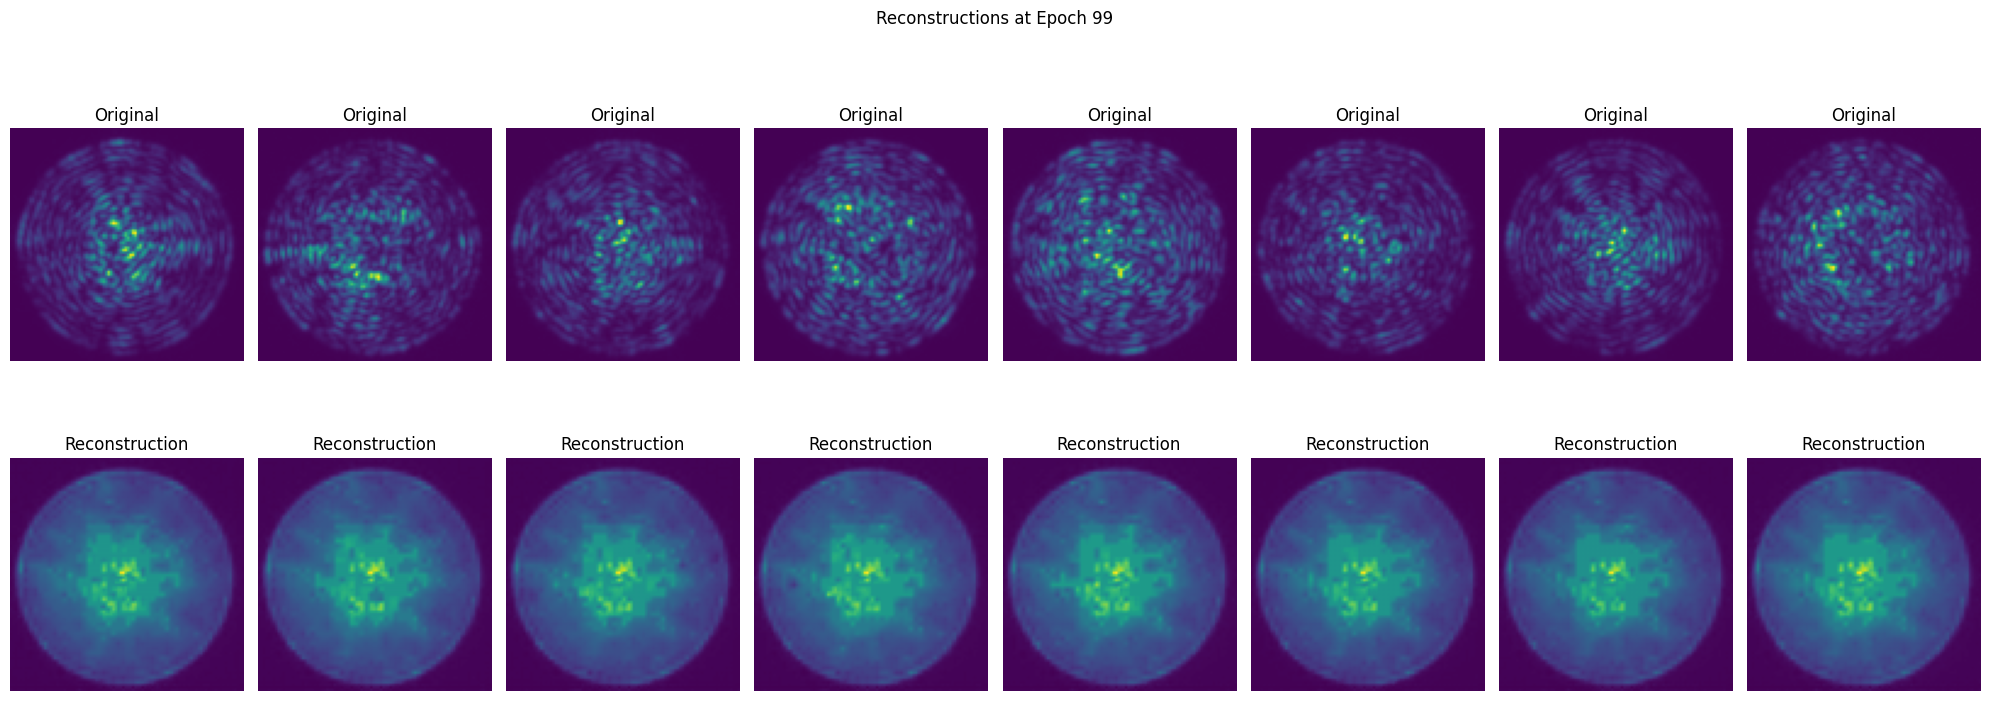

In [94]:
show_reconstruction(model, data_loader, epoch, device)

In [95]:
mu.shape

torch.Size([25, 256])

In [65]:
class ConditionalUNet1D(nn.Module):
    def __init__(self, latent_dim=256, time_emb_dim=128):
        super().__init__()
        self.latent_dim = latent_dim

        # Time embedding
        self.time_emb = nn.Sequential(
            nn.Linear(1, time_emb_dim),
            nn.ReLU(),
            nn.Linear(time_emb_dim, latent_dim)
        )

        # Binary pattern encoder: CNN → latent_dim
        self.cond_encoder = nn.Sequential(
            nn.Conv2d(1, 16, 4, stride=2, padding=1),  
            nn.ReLU(),
            nn.Conv2d(16, 32, 4, stride=2, padding=1),  # →
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 5 * 5, latent_dim),  # ✅ 64×4×4 = 1024,
            nn.ReLU()
        )

        # U-Net blocks
        def block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv1d(in_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv1d(out_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU()
            )

        self.down1 = block(1, 32)
        self.down2 = block(32, 64)
        self.down3 = block(64, 128)
        self.middle = block(128, 128)
        self.up3 = block(128, 64)
        self.up2 = block(64, 32)
        self.up1 = block(32, 1)

    def forward(self, x, t, cond_img):
        # x: [B, latent_dim]
        B, L = x.shape
        x = x.unsqueeze(1)  # [B, 1, L]
    


        # Timestep embedding
        t = t.unsqueeze(1).float() / 1000
        t_embed = self.time_emb(t).unsqueeze(1)  # [B, latent_dim, 1]

        # Conditioning vector
        cond_vec = self.cond_encoder(cond_img)  # [B, latent_dim]
        print(cond_vec.shape)
        cond_vec = cond_vec.unsqueeze(1)  # [B, latent_dim, 1]

        # Add both embeddings
        x = x + t_embed + cond_vec
        print("x:", x.shape)
        print("t_embed:", t_embed.shape)
        print("cond_vec:", cond_vec.shape)

        # U-Net pass
        d1 = self.down1(x)  # [B, 32, L]
        d2 = self.down2(d1)  # [B, 64, L]
        d3 = self.down3(d2)  # [B, 128, L]

        mid = self.middle(d3)

        u3 = self.up3(mid) + d2
        u2 = self.up2(u3) + d1
        u1 = self.up1(u2)

        return u1.squeeze(1)  # [B, L]


In [66]:
z_tensor = torch.tensor(latents)         # [N, 256]
# cond_tensor = torch.tensor(binary_imgs)  # [N, 1, 96, 96]
print("cond shape:", dataset[1][1].shape)  # should be [B, 1, 96, 96]
# y_data = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)  # [N, 1, 96, 96]
y_data.shape

cond shape: torch.Size([1, 36, 36])


/tmp/6091135.1.all.q/ipykernel_743095/4030802953.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  z_tensor = torch.tensor(latents)         # [N, 256]


(38009, 36, 36)

In [67]:
# binary_imgs = np.load('./data/bending1/y.p.npy')  # shape: [N, 96, 96] or [N, 96, 96, 1]
from torch.utils.data import DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau


num_epochs=100
T = 1000
y_data = np.load('./data/bending1/y.p.npy')
y_data = y_data.reshape(-1,36,36)
# Linear beta schedule (from DDPM paper)
def linear_beta_schedule(timesteps):
    beta_start = 0.0001
    beta_end = 0.02
    return torch.linspace(beta_start, beta_end, timesteps)

# Generate betas
betas = linear_beta_schedule(T)

# Calculate alphas and cumulative products
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
alphas_cumprod_prev = torch.cat([torch.tensor([1.0]), alphas_cumprod[:-1]])

# Precompute √ᾱₜ and √(1 - ᾱₜ)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)

# Also useful for reverse process if doing DDIM
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
posterior_variance = betas * (1.0 - alphas_cumprod_prev) / (1.0 - alphas_cumprod)

class LatentSpeckleDataset(torch.utils.data.Dataset):
    def __init__(self, z_latents, binary_imgs):
        self.z = torch.tensor(z_latents, dtype=torch.float32)
        self.cond = torch.tensor(binary_imgs, dtype=torch.float32)

    def __len__(self):
        return len(self.z)

    def __getitem__(self, idx):
        cond_img = self.cond[idx]
        if cond_img.ndim == 2:  # [36, 36]
            cond_img = cond_img.unsqueeze(0)  # → [1, 36, 36]
        return self.z[idx], cond_img  # (z, binary_image)


dataset = LatentSpeckleDataset(latents, y_data)
train_set, val_set = random_split(dataset, [0.8, 0.2])
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64)



train_losses = []
val_losses = []
model = ConditionalUNet1D().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

loss_fn = nn.MSELoss()

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for z, cond in train_loader:
        z, cond = z.to(device), cond.to(device)
        t = torch.randint(0, T, (z.shape[0],), device=device)
        noise = torch.randn_like(z)

        sqrt_alpha_t = sqrt_alphas_cumprod[t].unsqueeze(1).to(device)
        sqrt_one_minus_alpha_t = sqrt_one_minus_alphas_cumprod[t].unsqueeze(1).to(device)

        z_noisy = sqrt_alpha_t * z + sqrt_one_minus_alpha_t * noise
        print("z shape:", z.shape)           # [64, 256]
        print("noise shape:", noise.shape) 
        print("z_noisy shape:", z_noisy.shape)  # ✅ should be [64, 256]


        pred_noise = model(z_noisy, t, cond)
        loss = loss_fn(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    train_losses.append(total_train_loss / len(train_loader))

    # 🔍 Optional: Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for z_val, cond_val in val_loader:
            z_val, cond_val = z_val.to(device), cond_val.to(device)
            t_val = torch.randint(0, T, (z_val.shape[0],), device=device)
            noise = torch.randn_like(z_val)
            z_noisy = sqrt_alphas_cumprod[t_val].unsqueeze(1) * z_val + \
                      sqrt_one_minus_alphas_cumprod[t_val].unsqueeze(1) * noise
            pred = model(z_noisy, t_val, cond_val)
            val_loss = loss_fn(pred, noise)
            total_val_loss += val_loss.item()

    val_losses.append(total_val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_losses[-1]:.7f} | Val Loss: {val_losses[-1]:.7f} | LR: {scheduler.get_last_lr()[0]:.6f}")
    scheduler.step(val_losses[-1])


z shape: torch.Size([64, 256])
noise shape: torch.Size([64, 256])
z_noisy shape: torch.Size([64, 256])


/tmp/6091135.1.all.q/ipykernel_743095/2333022019.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.z = torch.tensor(z_latents, dtype=torch.float32)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1024 and 1600x256)

In [57]:
print("cond_batch shape:", cond.shape)  # should be [B, 1, 36, 36]


cond_batch shape: torch.Size([64, 36, 36])


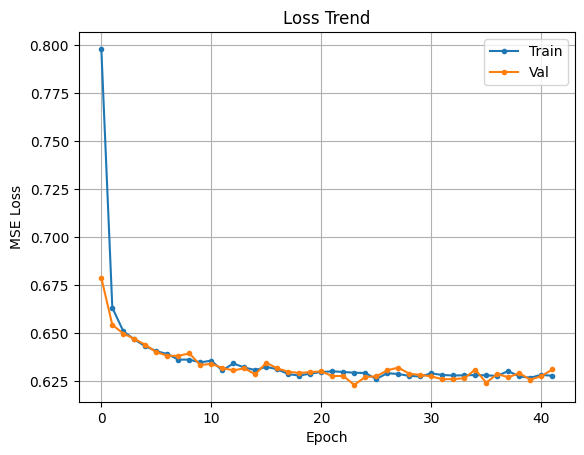

In [170]:
plt.plot(train_losses, label="Train", marker='.')
plt.plot(val_losses, label="Val", marker='.')
plt.title("Loss Trend")
plt.ylabel("MSE Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()


In [169]:
def plot_comparisons_with_noise(model, vae, val_loader, T=1000, latent_dim=256, num_samples=5):
    model.eval()
    vae.eval()

    batch = next(iter(val_loader))
    z_batch, cond_batch = batch
    z_batch = z_batch[:num_samples].to(device)
    cond_batch = cond_batch[:num_samples].to(device)

    # Decode real speckle images
    real_imgs = vae.decode(z_batch).cpu()
    real_imgs = (real_imgs * 0.5) + 0.5
    real_imgs = real_imgs.clamp(0, 1)

    gen_imgs = []
    noise_imgs = []

    for i in range(num_samples):
        cond = cond_batch[i].unsqueeze(0)
        t_T = torch.tensor([T - 1], device=device)

        # Start from real latent + noise (for visualization)
        noise = torch.randn_like(z_batch[i].unsqueeze(0))
        sqrt_alpha = sqrt_alphas_cumprod[T - 1].sqrt().to(device)
        sqrt_1m_alpha = sqrt_one_minus_alphas_cumprod[T - 1].to(device)

        z_noisy = sqrt_alpha * z_batch[i] + sqrt_1m_alpha * noise
        z_noisy = z_noisy.unsqueeze(0)

        noise_img = vae.decode(z_noisy).cpu().squeeze()
        noise_img = (noise_img * 0.5) + 0.5
        noise_img = noise_img.clamp(0, 1)
        noise_imgs.append(noise_img.numpy())

        # Sample using diffusion model
        z_pred = sample_conditioned_latent(model, cond, T=T, latent_dim=latent_dim)
        gen_img = vae.decode(z_pred).cpu().squeeze()
        gen_img = (gen_img * 0.5) + 0.5
        gen_imgs.append(gen_img.clamp(0, 1).numpy())

    # Plot
    plt.figure(figsize=(16, 3 * num_samples))
    for i in range(num_samples):
        cond_img = cond_batch[i].squeeze().cpu().numpy()
        cond_img = cond_img / cond_img.max() if cond_img.max() > 0 else cond_img

        real_img = real_imgs[i].squeeze().cpu().numpy()
        gen_img = gen_imgs[i]
        noise_img = noise_imgs[i]

        plt.subplot(num_samples, 4, i * 4 + 1)
        plt.imshow(cond_img, cmap='gray')
        plt.title("Pattern")
        plt.axis('off')

        plt.subplot(num_samples, 4, i * 4 + 2)
        plt.imshow(noise_img, cmap='gray')
        plt.title("Noisy Image")
        plt.axis('off')

        plt.subplot(num_samples, 4, i * 4 + 3)
        plt.imshow(real_img, cmap='gray')
        plt.title("Real Speckle")
        plt.axis('off')

        plt.subplot(num_samples, 4, i * 4 + 4)
        plt.imshow(gen_img, cmap='gray')
        plt.title("Generated Speckle")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
plot_comparisons_with_noise(model, vae, val_loader, num_samples=5)

NameError: name 'vae' is not defined

In [ ]:
@torch.no_grad()
def sample_conditional(model, cond_img, n=1, latent_dim=256):
    model.eval()
    x = torch.randn(n, latent_dim).to(device)

    for t in reversed(range(T)):
        t_tensor = torch.full((n,), t, device=device)
        x = x.to(device)
        pred_noise = model(x, t_tensor, cond_img)

        beta_t = betas[t].to(device)
        alpha = alphas[t].to(device)
        sqrt_one_minus_alpha = sqrt_one_minus_alphas_cumprod[t].to(device)

        if t > 0:
            noise = torch.randn_like(x)
        else:
            noise = 0

        x = (1 / torch.sqrt(alpha)) * (x - beta_t / sqrt_one_minus_alpha * pred_noise) + torch.sqrt(beta_t) * noise

    return x


In [32]:
latents = np.load("latent_vectors.npy")  # shape: [N, 256]
latents = torch.tensor(latents, dtype=torch.float32)
assert latents.shape[0] == y_data.shape[0], "Latents and binary images must have same number of samples!"
latents.shape[0] == y_data.shape[0]

True

In [ ]:
cond_img = torch.tensor(my_binary_pattern).unsqueeze(0).to(device)  # [1, 1, 96, 96]
z_pred = sample_conditional(model, cond_img)
speckle_pred = vae.decode(z_pred)


In [54]:
torch.save(model_vae, 'model_vae_resnet_512_beta_0.05.pkt')

In [2]:
import torch
import torch.nn as nn

# --- Building Block ---

class ResnetBlock2D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        # GroupNorm is often used in VAEs/U-Nets as it's independent of batch size
        self.norm1 = nn.GroupNorm(8, out_channels) 
        self.act1 = nn.SiLU() # SiLU (Swish) is a modern alternative to ReLU
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.norm2 = nn.GroupNorm(8, out_channels)
        self.act2 = nn.SiLU()
        
        # 1x1 convolution for the residual connection if channels change
        self.residual_conv = nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        res = self.residual_conv(x)
        x = self.act1(self.norm1(self.conv1(x)))
        x = self.act2(self.norm2(self.conv2(x)))
        return x + res

# --- Main VAE Class ---

class ResnetVAE(nn.Module):
    def __init__(self, latent_dim=512):
        super().__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            # Input: [1, 96, 96]
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1), # -> [64, 48, 48]
            ResnetBlock2D(64, 64),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1), # -> [128, 24, 24]
            ResnetBlock2D(128, 128),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1), # -> [256, 12, 12]
            ResnetBlock2D(256, 256),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1), # -> [512, 6, 6]
            nn.Flatten()
        )
        
        # Calculate flattened size
        flat_size = 512 * 6 * 6
        self.fc_mu = nn.Linear(flat_size, latent_dim)
        self.fc_logvar = nn.Linear(flat_size, latent_dim)

        # Decoder
        self.decoder_fc = nn.Linear(latent_dim, flat_size)
        
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (512, 6, 6)),
            ResnetBlock2D(512, 256),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [256, 12, 12]
            nn.Conv2d(256, 256, 3, padding=1),
            ResnetBlock2D(256, 128),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [128, 24, 24]
            nn.Conv2d(128, 128, 3, padding=1),
            ResnetBlock2D(128, 64),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [64, 48, 48]
            nn.Conv2d(64, 64, 3, padding=1),
            ResnetBlock2D(64, 64),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [64, 96, 96]
            nn.Conv2d(64, 1, 3, padding=1),
            nn.Tanh()  # Output in [-1, 1]
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.decoder_fc(z)
        x_recon = self.decoder(h)
        return x_recon

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar


def vae_loss(recon_x, x, mu, logvar,beta=0.001):
    recon_loss = F.mse_loss(recon_x, x, reduction='mean')  # or 'sum'
    kl_div = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta* kl_div, recon_loss, kl_div

## Upscaling VAE

In [50]:
import torch
import torch.nn as nn

# --- Building Block ---

class ResnetBlock2D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        # GroupNorm is often used in VAEs/U-Nets as it's independent of batch size
        self.norm1 = nn.GroupNorm(8, out_channels) 
        self.act1 = nn.SiLU() # SiLU (Swish) is a modern alternative to ReLU
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.norm2 = nn.GroupNorm(8, out_channels)
        self.act2 = nn.SiLU()
        
        # 1x1 convolution for the residual connection if channels change
        self.residual_conv = nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        res = self.residual_conv(x)
        x = self.act1(self.norm1(self.conv1(x)))
        x = self.act2(self.norm2(self.conv2(x)))
        return x + res

# --- Main VAE Class ---

class ResnetVAE(nn.Module):
    def __init__(self, latent_dim=512):
        super().__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            # Input: [1, 96, 96]
            nn.Conv2d(1, 96, kernel_size=3, stride=2, padding=1), # -> [64, 48, 48]
            ResnetBlock2D(96, 96),
            nn.Conv2d(96, 192, kernel_size=3, stride=2, padding=1), # -> [128, 24, 24]
            ResnetBlock2D(192, 192),
            nn.Conv2d(192, 384, kernel_size=3, stride=2, padding=1), # -> [256, 12, 12]
            ResnetBlock2D(384, 384),
            nn.Conv2d(384, 768, kernel_size=3, stride=2, padding=1), # -> [512, 6, 6]
            nn.Flatten()
        )
        
        # Calculate flattened size
        flat_size = 768 * 6 * 6
        self.fc_mu = nn.Linear(flat_size, latent_dim)
        self.fc_logvar = nn.Linear(flat_size, latent_dim)

        # Decoder
        self.decoder_fc = nn.Linear(latent_dim, flat_size)
        
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (768, 6, 6)),
            ResnetBlock2D(768, 384),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [256, 12, 12]
            nn.Conv2d(384, 384, 3, padding=1),
            ResnetBlock2D(384, 192),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [128, 24, 24]
            nn.Conv2d(192, 192, 3, padding=1),
            ResnetBlock2D(192, 96),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [64, 48, 48]
            nn.Conv2d(96, 96, 3, padding=1),
            ResnetBlock2D(96, 96),
            nn.Upsample(scale_factor=2, mode='nearest'), # -> [64, 96, 96]
            nn.Conv2d(96, 1, 3, padding=1),
            nn.Tanh()  # Output in [-1, 1]
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.decoder_fc(z)
        x_recon = self.decoder(h)
        return x_recon

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar


def vae_loss(recon_x, x, mu, logvar,beta=0.001):
    recon_loss = F.mse_loss(recon_x, x, reduction='mean')  # or 'sum'
    kl_div = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta* kl_div, recon_loss, kl_div

In [51]:
# # This i used originally for first 512 resnet vae code
# import torch.nn.functional as F
# beta=0.001

# x_data = np.load('./data/bending1/x.p.npy')
# x_data = x_data.squeeze(-1) 
# x_data_tensor = torch.tensor(x_data, dtype=torch.float32)

# x_data_tensor = x_data_tensor / 255.0


# # Normalize: [0, max] → [0, 1] → [-1, 1]
# x_min = x_data_tensor.min()
# x_max = x_data_tensor.max()

# # Print to confirm
# print("Raw min/max:", x_min.item(), x_max.item())


# x_data_tensor = (x_data_tensor - x_min) / (x_max - x_min)


# # Normalize to [-1, 1] manually
# x_data_tensor = (x_data_tensor - 0.5) / 0.5  # Now in [-1, 1]

# # Add channel dimension
# x_data_tensor = x_data_tensor.unsqueeze(1)  # Shape: [N, 1, 96, 96]

# dataset = ImageDataset(x_data_tensor)
# data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# print("Image tensor min:", x_data_tensor.min().item())
# print("Image tensor max:", x_data_tensor.max().item())

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_vae = ResnetVAE(latent_dim=512).to(device)
# optimizer = torch.optim.Adam(model_vae.parameters(), lr=0.0001)

# for epoch in range(1, 100):
#     model_vae.train()
#     total_loss, total_recon, total_kl = 0, 0, 0

#     for data in data_loader:
#         data = data.to(device)
#         optimizer.zero_grad()

#         recon, mu, logvar = model_vae(data)
#         loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         total_recon += recon_loss.item()
#         total_kl += kl_loss.item()

#     avg_loss = total_loss / len(data_loader)
#     print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

In [ ]:
import torch.nn.functional as F
beta=0.05

x_data = np.load('./data/bending1/x.p.npy')
x_data = x_data.squeeze(-1) 
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)

x_data_tensor = x_data_tensor / 255.0


# Normalize: [0, max] → [0, 1] → [-1, 1]
x_min = x_data_tensor.min()
x_max = x_data_tensor.max()

# Print to confirm
print("Raw min/max:", x_min.item(), x_max.item())


x_data_tensor = (x_data_tensor - x_min) / (x_max - x_min)


# Normalize to [-1, 1] manually
x_data_tensor = (x_data_tensor - 0.5) / 0.5  # Now in [-1, 1]

# Add channel dimension
x_data_tensor = x_data_tensor.unsqueeze(1)  # Shape: [N, 1, 96, 96]

dataset = ImageDataset(x_data_tensor)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

print("Image tensor min:", x_data_tensor.min().item())
print("Image tensor max:", x_data_tensor.max().item())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_vae = ResnetVAE(latent_dim=512).to(device)
optimizer = torch.optim.Adam(model_vae.parameters(), lr=0.0001)

for epoch in range(1, 100):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_vae.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Raw min/max: 0.6627451181411743 254.89804077148438
Image tensor min: -1.0
Image tensor max: 1.0
Epoch [1/100] | Loss: 0.00813 | Recon: 9.22 | KL: 8.83
Epoch [2/100] | Loss: 0.00638 | Recon: 7.11 | KL: 9.35
Epoch [3/100] | Loss: 0.00622 | Recon: 6.87 | KL: 10.38
Epoch [4/100] | Loss: 0.00608 | Recon: 6.68 | KL: 10.92
Epoch [5/100] | Loss: 0.00582 | Recon: 6.40 | KL: 10.27
Epoch [6/100] | Loss: 0.00576 | Recon: 6.31 | KL: 10.71
Epoch [7/100] | Loss: 0.00572 | Recon: 6.24 | KL: 11.18
Epoch [8/100] | Loss: 0.00570 | Recon: 6.19 | KL: 11.63
Epoch [9/100] | Loss: 0.00566 | Recon: 6.13 | KL: 11.93
Epoch [10/100] | Loss: 0.00564 | Recon: 6.09 | KL: 12.28
Epoch [11/100] | Loss: 0.00562 | Recon: 6.05 | KL: 12.49
Epoch [12/100] | Loss: 0.00560 | Recon: 6.01 | KL: 12.77
Epoch [13/100] | Loss: 0.00558 | Recon: 5.98 | KL: 12.92
Epoch [14/100] | Loss: 0.00553 | Recon: 5.92 | KL: 13.04
Epoch [15/100] | Loss: 0.00548 | Recon: 5.86 | KL: 13.03
Epoch [16/100] | Loss: 0.00546 | Recon: 5.83 | KL: 13.11
Epo

In [24]:
for epoch in range(80, 100):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_vae.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/100] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Epoch [80/100] | Loss: 0.00598 | Recon: 6.46 | KL: 6.43
Epoch [81/100] | Loss: 0.00597 | Recon: 6.45 | KL: 6.46
Epoch [82/100] | Loss: 0.00596 | Recon: 6.44 | KL: 6.48
Epoch [83/100] | Loss: 0.00596 | Recon: 6.43 | KL: 6.50
Epoch [84/100] | Loss: 0.00595 | Recon: 6.42 | KL: 6.55
Epoch [85/100] | Loss: 0.00595 | Recon: 6.40 | KL: 6.64
Epoch [86/100] | Loss: 0.00593 | Recon: 6.38 | KL: 6.65
Epoch [87/100] | Loss: 0.00591 | Recon: 6.35 | KL: 6.73
Epoch [88/100] | Loss: 0.00590 | Recon: 6.33 | KL: 6.77
Epoch [89/100] | Loss: 0.00589 | Recon: 6.31 | KL: 6.87
Epoch [90/100] | Loss: 0.00588 | Recon: 6.28 | KL: 6.97
Epoch [91/100] | Loss: 0.00586 | Recon: 6.26 | KL: 7.01
Epoch [92/100] | Loss: 0.00585 | Recon: 6.25 | KL: 7.07
Epoch [93/100] | Loss: 0.00585 | Recon: 6.24 | KL: 7.12
Epoch [94/100] | Loss: 0.00584 | Recon: 6.23 | KL: 7.15
Epoch [95/100] | Loss: 0.00583 | Recon: 6.22 | KL: 7.14
Epoch [96/100] | Loss: 0.00583 | Recon: 6.21 | KL: 7.19
Epoch [97/100] | Loss: 0.00583 | Recon: 6.20 | K

In [28]:
for epoch in range(137, 150):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_vae.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/150] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Epoch [137/150] | Loss: 0.00574 | Recon: 6.02 | KL: 7.94
Epoch [138/150] | Loss: 0.00574 | Recon: 6.02 | KL: 7.94
Epoch [139/150] | Loss: 0.00573 | Recon: 6.02 | KL: 7.90
Epoch [140/150] | Loss: 0.00573 | Recon: 6.01 | KL: 7.94
Epoch [141/150] | Loss: 0.00573 | Recon: 6.01 | KL: 7.95
Epoch [142/150] | Loss: 0.00573 | Recon: 6.01 | KL: 7.99
Epoch [143/150] | Loss: 0.00573 | Recon: 6.01 | KL: 7.97
Epoch [144/150] | Loss: 0.00573 | Recon: 6.00 | KL: 8.01
Epoch [145/150] | Loss: 0.00573 | Recon: 6.00 | KL: 7.98
Epoch [146/150] | Loss: 0.00573 | Recon: 6.00 | KL: 8.04
Epoch [147/150] | Loss: 0.00573 | Recon: 6.00 | KL: 8.03
Epoch [148/150] | Loss: 0.00572 | Recon: 5.99 | KL: 8.08
Epoch [149/150] | Loss: 0.00572 | Recon: 6.00 | KL: 8.02


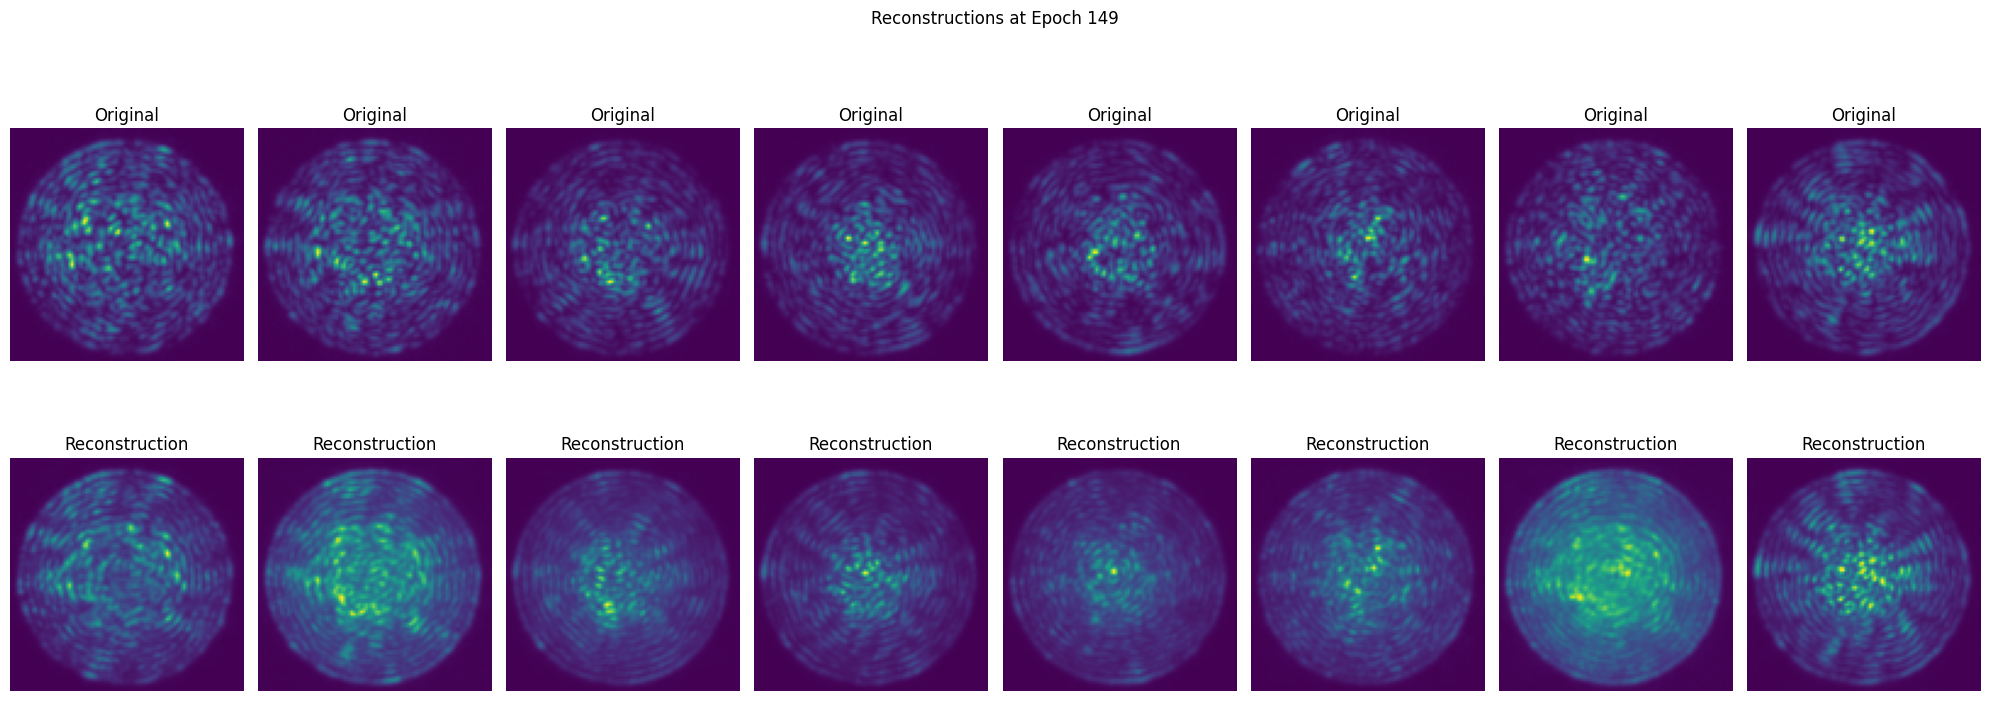

In [53]:
show_reconstruction(model_vae, data_loader, epoch=149, device=device)

In [16]:
# torch.save(model_vae, 'model_vae_resnet_512.pkt')

In [ ]:
# https://www.cnblogs.com/wangxiaocvpr/p/11605989.html
# https://medium.com/@mathparracho/variational-autoencoders-vaes-cvaes-%CE%B2-vaes-generative-intuition-practice-4b7b4011f55b
# https://logongas.es/lib/exe/fetch.php?media=clase:iabd:pia:2eval:the_math_behind_adam_optimizer.pdf
# https://openreview.net/pdf?id=Sy2fzU9gl
# https://huggingface.co/blog/annotated-diffusion

## Corrected Upscaling

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange
from torch import einsum

# --- Building Block --- (Unchanged)
class ResnetBlock2D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.norm1 = nn.GroupNorm(8, out_channels) 
        self.act1 = nn.SiLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.norm2 = nn.GroupNorm(8, out_channels)
        self.act2 = nn.SiLU()
        self.residual_conv = nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        res = self.residual_conv(x)
        x = self.act1(self.norm1(self.conv1(x)))
        x = self.act2(self.norm2(self.conv2(x)))
        return x + res

# --- Main VAE Class --- (Corrected)
class ResnetVAE(nn.Module):
    def __init__(self, latent_dim=512):
        super().__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            # Input: [1, 96, 96]
            nn.Conv2d(1, 96, kernel_size=3, stride=2, padding=1),       # -> [96, 48, 48]
            ResnetBlock2D(96, 96),
            nn.Conv2d(96, 192, kernel_size=3, stride=2, padding=1),     # -> [192, 24, 24]
            ResnetBlock2D(192, 192),
            nn.Conv2d(192, 384, kernel_size=3, stride=2, padding=1),    # -> [384, 12, 12]
            ResnetBlock2D(384, 384),
            nn.Conv2d(384, 768, kernel_size=3, stride=2, padding=1),    # -> [768, 6, 6]
            ResnetBlock2D(768, 768), # Added a ResBlock for symmetry
            nn.Flatten()
        )
        
        # Calculate flattened size
        flat_size = 768 * 6 * 6
        self.fc_mu = nn.Linear(flat_size, latent_dim)
        self.fc_logvar = nn.Linear(flat_size, latent_dim)

        # Decoder
        self.decoder_fc = nn.Linear(latent_dim, flat_size)
        
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (768, 6, 6)),
            ResnetBlock2D(768, 768),
            nn.Upsample(scale_factor=2, mode='nearest'),               # -> [768, 12, 12]
            nn.Conv2d(768, 384, 3, padding=1),
            ResnetBlock2D(384, 384),
            nn.Upsample(scale_factor=2, mode='nearest'),               # -> [384, 24, 24]
            nn.Conv2d(384, 192, 3, padding=1),
            ResnetBlock2D(192, 192),
            nn.Upsample(scale_factor=2, mode='nearest'),               # -> [192, 48, 48]
            nn.Conv2d(192, 96, 3, padding=1),
            ResnetBlock2D(96, 96),
            nn.Upsample(scale_factor=2, mode='nearest'),               # -> [96, 96, 96]
            nn.Conv2d(96, 1, 3, padding=1),
            nn.Tanh()  # Output in [-1, 1]
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.decoder_fc(z)
        x_recon = self.decoder(h)
        return x_recon

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

# --- Loss Function --- (Unchanged)
def vae_loss(recon_x, x, mu, logvar,beta=0.001):
    recon_loss = F.mse_loss(recon_x, x, reduction='mean')
    kl_div = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta* kl_div, recon_loss, kl_div

In [6]:
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]

        # Apply transformations if specified
        if self.transform:
            image = self.transform(image)
            
        return image

In [7]:
import torch.nn.functional as F
beta=0.03

x_data = np.load('./data/bending1/x.p.npy')
x_data = x_data.squeeze(-1) 
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)

x_data_tensor = x_data_tensor / 255.0


# Normalize: [0, max] → [0, 1] → [-1, 1]
x_min = x_data_tensor.min()
x_max = x_data_tensor.max()

# Print to confirm
print("Raw min/max:", x_min.item(), x_max.item())


x_data_tensor = (x_data_tensor - x_min) / (x_max - x_min)


# Normalize to [-1, 1] manually
x_data_tensor = (x_data_tensor - 0.5) / 0.5  # Now in [-1, 1]

# Add channel dimension
x_data_tensor = x_data_tensor.unsqueeze(1)  # Shape: [N, 1, 96, 96]

dataset = ImageDataset(x_data_tensor)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

print("Image tensor min:", x_data_tensor.min().item())
print("Image tensor max:", x_data_tensor.max().item())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_vae = ResnetVAE(latent_dim=512).to(device)
optimizer = torch.optim.Adam(model_vae.parameters(), lr=2e-5)

for epoch in range(1, 201):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_vae.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/200] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Raw min/max: 0.6627451181411743 254.89804077148438
Image tensor min: -1.0
Image tensor max: 1.0
Epoch [1/200] | Loss: 0.00912 | Recon: 10.29 | KL: 18.30
Epoch [2/200] | Loss: 0.00645 | Recon: 7.23 | KL: 14.48
Epoch [3/200] | Loss: 0.00609 | Recon: 6.81 | KL: 14.05
Epoch [4/200] | Loss: 0.00585 | Recon: 6.54 | KL: 13.90
Epoch [5/200] | Loss: 0.00574 | Recon: 6.38 | KL: 14.70
Epoch [6/200] | Loss: 0.00566 | Recon: 6.26 | KL: 15.60
Epoch [7/200] | Loss: 0.00559 | Recon: 6.15 | KL: 16.45
Epoch [8/200] | Loss: 0.00551 | Recon: 6.03 | KL: 17.13
Epoch [9/200] | Loss: 0.00543 | Recon: 5.92 | KL: 17.55
Epoch [10/200] | Loss: 0.00536 | Recon: 5.83 | KL: 17.97
Epoch [11/200] | Loss: 0.00531 | Recon: 5.75 | KL: 18.29
Epoch [12/200] | Loss: 0.00526 | Recon: 5.69 | KL: 18.55
Epoch [13/200] | Loss: 0.00523 | Recon: 5.65 | KL: 18.83
Epoch [14/200] | Loss: 0.00519 | Recon: 5.60 | KL: 19.05
Epoch [15/200] | Loss: 0.00517 | Recon: 5.56 | KL: 19.28
Epoch [16/200] | Loss: 0.00515 | Recon: 5.53 | KL: 19.42


KeyboardInterrupt: 

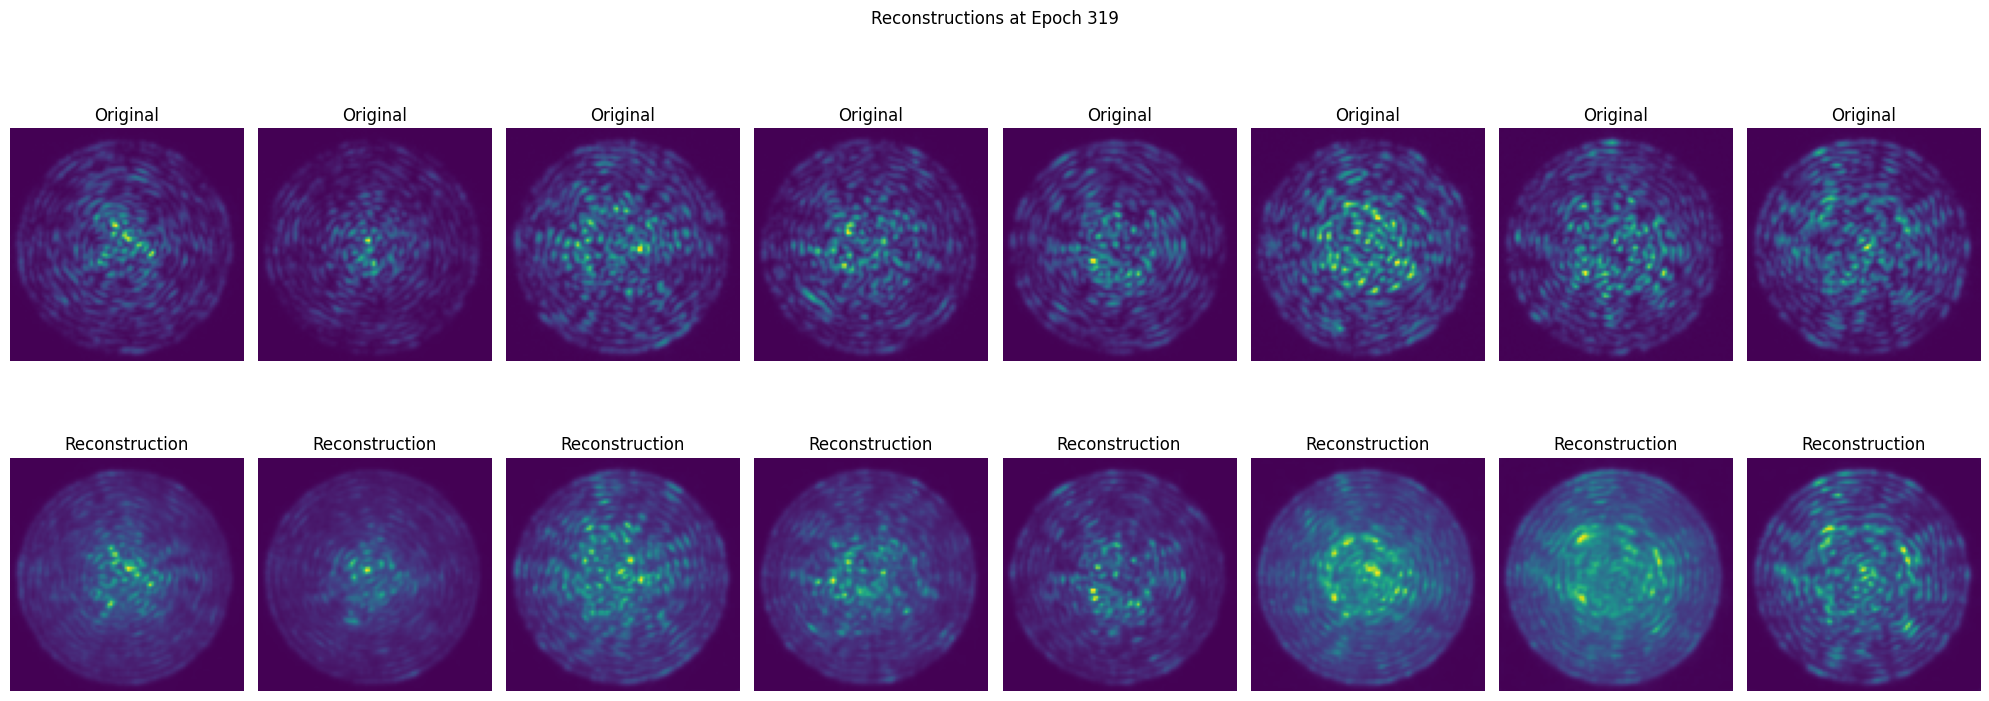

In [20]:
show_reconstruction(model_vae, data_loader, epoch=319, device=device)

In [8]:
for epoch in range(152, 211):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_vae.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/211] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Epoch [152/100] | Loss: 0.00427 | Recon: 4.21 | KL: 28.70
Epoch [153/100] | Loss: 0.00427 | Recon: 4.21 | KL: 28.72
Epoch [154/100] | Loss: 0.00426 | Recon: 4.20 | KL: 28.83
Epoch [155/100] | Loss: 0.00426 | Recon: 4.20 | KL: 28.76
Epoch [156/100] | Loss: 0.00426 | Recon: 4.19 | KL: 28.81
Epoch [157/100] | Loss: 0.00425 | Recon: 4.19 | KL: 28.90
Epoch [158/100] | Loss: 0.00425 | Recon: 4.18 | KL: 28.87
Epoch [159/100] | Loss: 0.00424 | Recon: 4.18 | KL: 28.85
Epoch [160/100] | Loss: 0.00424 | Recon: 4.17 | KL: 29.02
Epoch [161/100] | Loss: 0.00424 | Recon: 4.17 | KL: 28.99
Epoch [162/100] | Loss: 0.00423 | Recon: 4.16 | KL: 29.03
Epoch [163/100] | Loss: 0.00423 | Recon: 4.16 | KL: 29.04
Epoch [164/100] | Loss: 0.00423 | Recon: 4.15 | KL: 29.07
Epoch [165/100] | Loss: 0.00423 | Recon: 4.15 | KL: 29.14
Epoch [166/100] | Loss: 0.00422 | Recon: 4.14 | KL: 29.18
Epoch [167/100] | Loss: 0.00422 | Recon: 4.14 | KL: 29.18
Epoch [168/100] | Loss: 0.00421 | Recon: 4.13 | KL: 29.18
Epoch [169/100

In [12]:
for epoch in range(211, 251):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_vae.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/200] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Epoch [211/200] | Loss: 0.00408 | Recon: 3.94 | KL: 30.44
Epoch [212/200] | Loss: 0.00408 | Recon: 3.93 | KL: 30.53
Epoch [213/200] | Loss: 0.00408 | Recon: 3.93 | KL: 30.47
Epoch [214/200] | Loss: 0.00407 | Recon: 3.92 | KL: 30.55
Epoch [215/200] | Loss: 0.00407 | Recon: 3.92 | KL: 30.58
Epoch [216/200] | Loss: 0.00407 | Recon: 3.91 | KL: 30.59
Epoch [217/200] | Loss: 0.00406 | Recon: 3.91 | KL: 30.60
Epoch [218/200] | Loss: 0.00406 | Recon: 3.91 | KL: 30.64
Epoch [219/200] | Loss: 0.00406 | Recon: 3.90 | KL: 30.68
Epoch [220/200] | Loss: 0.00406 | Recon: 3.90 | KL: 30.71
Epoch [221/200] | Loss: 0.00405 | Recon: 3.90 | KL: 30.70
Epoch [222/200] | Loss: 0.00405 | Recon: 3.89 | KL: 30.81
Epoch [223/200] | Loss: 0.00405 | Recon: 3.89 | KL: 30.77
Epoch [224/200] | Loss: 0.00405 | Recon: 3.88 | KL: 30.79
Epoch [225/200] | Loss: 0.00404 | Recon: 3.88 | KL: 30.80
Epoch [226/200] | Loss: 0.00404 | Recon: 3.87 | KL: 30.83
Epoch [227/200] | Loss: 0.00403 | Recon: 3.87 | KL: 30.81
Epoch [228/200

In [21]:
for epoch in range(319, 380):
    model_vae.train()
    total_loss, total_recon, total_kl = 0, 0, 0

    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()

        recon, mu, logvar = model_vae(data)
        loss, recon_loss, kl_loss = vae_loss(recon, data, mu, logvar,beta=beta)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_vae.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon_loss.item()
        total_kl += kl_loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f"Epoch [{epoch}/250] | Loss: {avg_loss:.5f} | Recon: {total_recon:.2f} | KL: {total_kl:.2f}")

Epoch [319/250] | Loss: 0.00379 | Recon: 3.52 | KL: 32.84
Epoch [320/250] | Loss: 0.00379 | Recon: 3.52 | KL: 32.84
Epoch [321/250] | Loss: 0.00379 | Recon: 3.52 | KL: 32.90
Epoch [322/250] | Loss: 0.00379 | Recon: 3.51 | KL: 32.94
Epoch [323/250] | Loss: 0.00378 | Recon: 3.51 | KL: 32.89
Epoch [324/250] | Loss: 0.00378 | Recon: 3.51 | KL: 32.94
Epoch [325/250] | Loss: 0.00378 | Recon: 3.50 | KL: 32.93
Epoch [326/250] | Loss: 0.00378 | Recon: 3.50 | KL: 33.01
Epoch [327/250] | Loss: 0.00378 | Recon: 3.50 | KL: 32.97
Epoch [328/250] | Loss: 0.00377 | Recon: 3.49 | KL: 32.99
Epoch [329/250] | Loss: 0.00377 | Recon: 3.49 | KL: 33.00
Epoch [330/250] | Loss: 0.00377 | Recon: 3.49 | KL: 33.06
Epoch [331/250] | Loss: 0.00377 | Recon: 3.48 | KL: 33.07
Epoch [332/250] | Loss: 0.00377 | Recon: 3.48 | KL: 33.08
Epoch [333/250] | Loss: 0.00376 | Recon: 3.48 | KL: 33.09
Epoch [334/250] | Loss: 0.00376 | Recon: 3.48 | KL: 33.14
Epoch [335/250] | Loss: 0.00376 | Recon: 3.47 | KL: 33.15
Epoch [336/250

In [22]:
epoch

379